# 3. 가설을 시각화

In [1]:
import pandas as pd
import numpy as np

In [2]:
CCTV_Seoul = pd.read_csv('./data/CCTV_preprocessing.csv', encoding='utf-8')
pop_Woman = pd.read_csv('./data/pop_woman_preprocessing.csv', encoding='utf-8')

In [3]:
CCTV_Seoul = CCTV_Seoul[CCTV_Seoul.columns[1:]]
pop_Woman = pop_Woman[pop_Woman.columns[1:]]
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [4]:
pop_Woman.head()

,구별,총인구,한국인여자,한국여자비율
0,종로구,162820.0,77978.0,47.892151
1,중구,133240.0,62656.0,47.024917
2,용산구,244203.0,118289.0,48.438799
3,성동구,311244.0,153304.0,49.255247
4,광진구,372164.0,182612.0,49.067615


In [5]:
data_result = pd.merge(CCTV_Seoul, pop_Woman, on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,총인구,한국인여자,한국여자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,294824.0,51.678177
1,강동구,773,379,99,155,377,166.490765,453233.0,225531.0,49.760498
2,강북구,748,369,120,138,204,125.203252,330192.0,166333.0,50.374631
3,강서구,884,388,258,184,81,134.793814,603772.0,305999.0,50.681217
4,관악구,1496,846,260,390,613,149.290780,525515.0,251113.0,47.784174
5,광진구,707,573,78,53,174,53.228621,372164.0,182612.0,49.067615
6,구로구,1561,1142,173,246,323,64.973730,447874.0,209373.0,46.748193
7,금천구,1015,674,51,269,354,100.000000,255082.0,116019.0,45.483021
8,노원구,1265,542,57,451,516,188.929889,569384.0,290354.0,50.994408
9,도봉구,485,238,159,42,386,246.638655,348646.0,176340.0,50.578524


In [6]:
data_result.to_csv('./data/woman_cctv_raw.csv', encoding='utf-8')

In [7]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,총인구,한국인여자,한국여자비율
0,강남구,2780,150.619195,570500.0,294824.0,51.678177
1,강동구,773,166.490765,453233.0,225531.0,49.760498
2,강북구,748,125.203252,330192.0,166333.0,50.374631
3,강서구,884,134.793814,603772.0,305999.0,50.681217
4,관악구,1496,149.290780,525515.0,251113.0,47.784174


In [8]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,총인구,한국인여자,한국여자비율
구별,,,,,
강남구,2780,150.619195,570500.0,294824.0,51.678177
강동구,773,166.490765,453233.0,225531.0,49.760498
강북구,748,125.203252,330192.0,166333.0,50.374631
강서구,884,134.793814,603772.0,305999.0,50.681217
관악구,1496,149.290780,525515.0,251113.0,47.784174


In [9]:
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기


if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

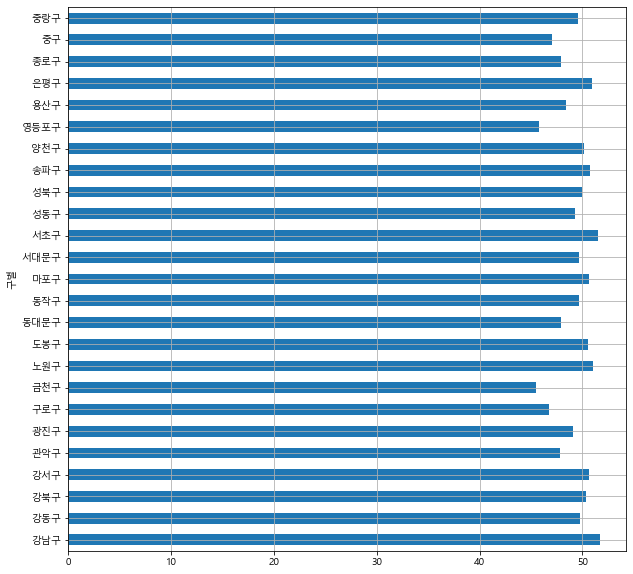

In [10]:
data_result['한국여자비율'].plot(kind='barh', grid=True, figsize=(10, 10)) # 판다스 데이터 프레임에서 바로 시각화 하기
plt.show()

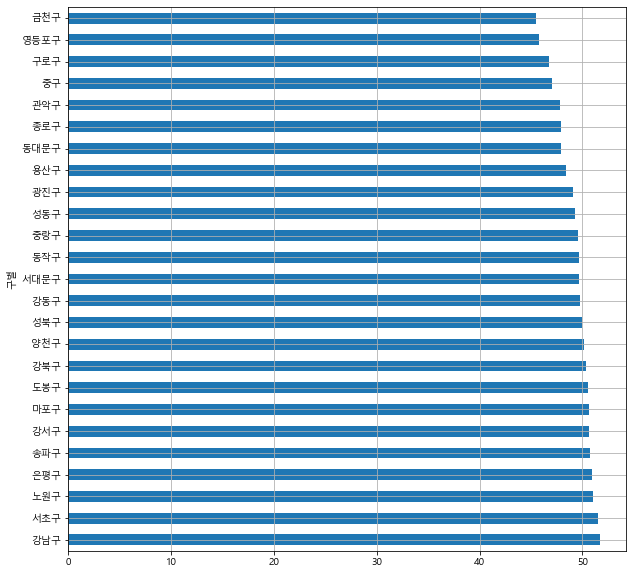

In [11]:
data_result['한국여자비율'].sort_values(ascending=False).plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

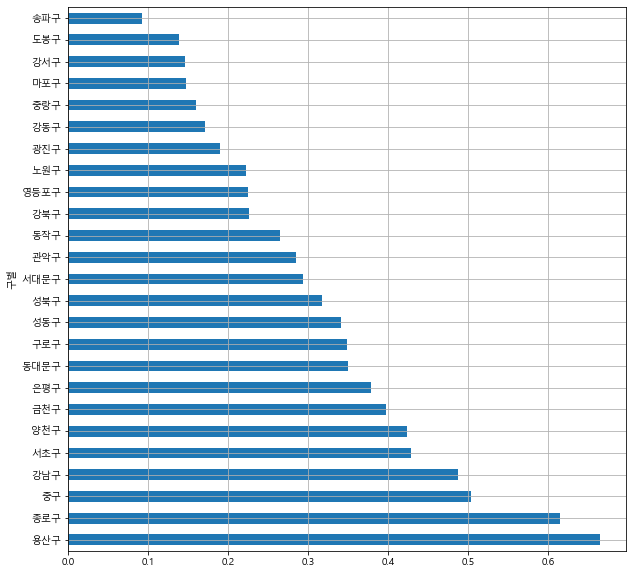

In [12]:
data_result['CCTV비율'] = data_result['소계'] / data_result['총인구'] * 100
data_result['CCTV비율'].sort_values(ascending=False).plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

## 중간 결과

* 여성인구비율은 금천구, 영등포구, 구로구, 중구, 관악구 순으로 낮았다.
* CCTV 비율은 송파구, 도봉구, 강서구, 마포구, 중랑구 순으로 낮았다.


여성인구비율 대비 CCTV 대수 확인

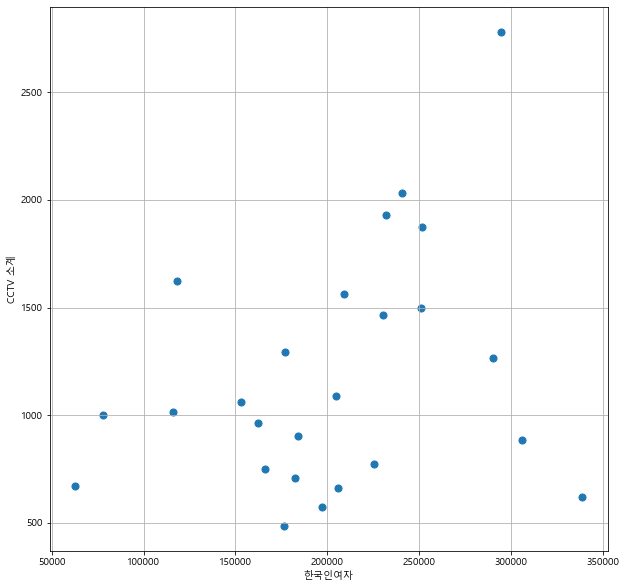

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['한국인여자'], data_result['소계'], s=50)
plt.xlabel('한국인여자')
plt.ylabel('CCTV 소계')
plt.grid()
plt.show()

In [14]:
fp1 = np.polyfit(data_result['한국인여자'], data_result['소계'], 1) # 인구수를 x놓고, y를 소계로 놓는 1차 함수
fp1

array([2.56193307e-03, 6.61015323e+02])

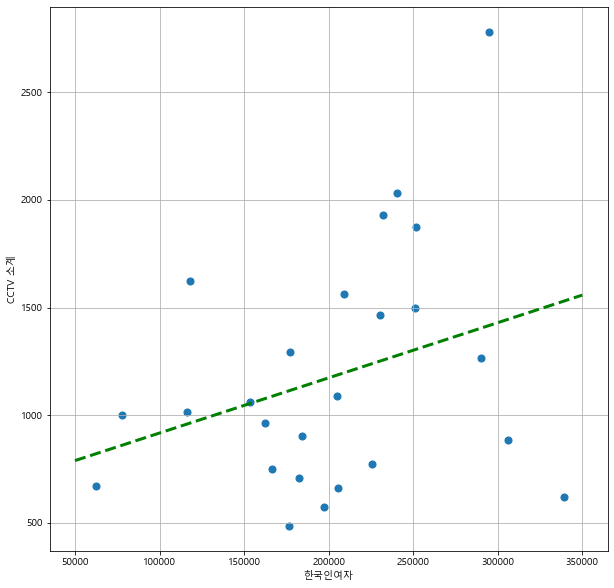

In [15]:
f1 = np.poly1d(fp1) # fp1의 정보를 이용해서( 기울기, 절편 ) 1차 함수 수식을 만들어 낸다.

# 함수에 들어갈 값을 만든다.
fx = np.linspace(50000, 350000, 100) # 10만부터 70만까지 100의 간격으로 정수 배열을 만들어 낸다.

plt.figure(figsize=(10, 10))
plt.scatter(data_result['한국인여자'], data_result['소계'], s=50)

# 상관 계수를 활용한 직선 긋기
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('한국인여자')
plt.ylabel('CCTV 소계')
plt.grid()
plt.show()

대략 150,000명의 한국인여자 수일 때,1100개의 CCTV를 설치하는 것이 기준이 될 수 있음
* 직선보다 위에 있으면 한국인 여자 수에 비해 CCTV가 많이 설치된 것
* 직선보다 아래에 있으면 한국인 여자 수에 비해 CCTV가 적게 설치된 것

In [16]:
fp1 = np.polyfit(data_result['한국인여자'], data_result['소계'], 1)
f1  = np.poly1d(fp1)
fx  = np.linspace(50000, 350000, 100)

# 오차 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['한국인여자']))

# 오차별로 정렬
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,총인구,한국인여자,한국여자비율,CCTV비율,오차
구별,,,,,,,
강남구,2780,150.619195,570500.0,294824.0,51.678177,0.487292,1363.665322
송파구,618,104.347826,667483.0,338908.0,50.774027,0.092587,911.274935
양천구,2034,34.671731,479978.0,240671.0,50.142090,0.423769,756.401684
서초구,1930,63.371266,450310.0,231958.0,51.510737,0.428594,674.723807
용산구,1624,53.216374,244203.0,118289.0,48.438799,0.665020,659.936176


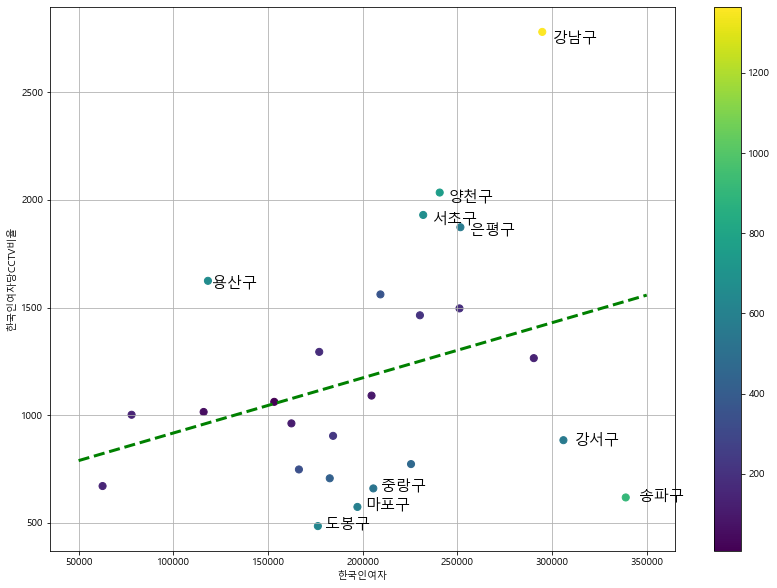

In [20]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['한국인여자'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') #x축 기준 인구수, y축 기준 CCTV 대수

#오차가 가장 큰 10개의 구에 대해서 텍스트 부여하기
for n in range(10):
    #scatter가 찍힌 좌표에 적당히 거리를 조절하여 해당하는 데이터의 인덱스(df_sort.index[n])를 출력하기
    plt.text(df_sort['한국인여자'][n]*1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize=15)
    
plt.xlabel('한국인여자')
plt.ylabel('한국인여자당CCTV비율')

plt.colorbar()
plt.grid()
plt.show()

# 4. 가설 평가
* 한국인여성이 가장 적은 구는 중구, 종로구, 금천구, 용산구, 성동구 순이었다.
* 여성인구의 수와 CCTV의 큰 관련은 없는 것으로 보였다. 
* 송파구는 여성 인구가 많음에도 CCTV는 적은 수를 운영하고 있다.

# 5. 비즈니스 적용 방안
* 여성 범죄가 많아지는 세상에 CCTV를 더 설치하여 시민의 안전을 보장할 수 있다.
* 여성 인구가 적은 구에 CCTV를 더 설치하여 범죄율을 낮춤으로써, 여성 인구의 유입을 꾀할 수 있다.